# 퍼셉트론 알고리즘

퍼셉트론은 노드(뉴런이라고도 하는)가 여러개(0개 이상)의 input을 입력받아서 1개 이상의 output을 출력하는 구조를 말한다.

이 책에서 퍼셉트론을 여러 뜻으로 쓰니까 헷갈릴 수 있음

그래서 이 장 이후에는 신경망(NN, neural network)이라는 말을 쓰자.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# pandas dataframe으로 진리표 만들기

# 먼저 numpy 배열로 똑같이 만들어 줌
ex_and = np.array([ [0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 1] ])
ex_nand = np.array([ [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 0] ])
ex_or = np.array([ [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1] ])

# numpy 배열을 pandas dataframe으로 
df_and = pd.DataFrame(ex_and, columns = col)
df_nand = pd.DataFrame(ex_nand, columns = col)
df_or = pd.DataFrame(ex_or, columns = col)

In [8]:
# AND 게이트의 진리표
df_and

,x1,x2,y
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1


In [11]:
# NAND 게이트의 진리표
df_nand

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [9]:
# OR 게이트의 진리표
df_or

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


# 게이트 구현

In [12]:
# AND 게이트 구현 (편향이 없는 경우)
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

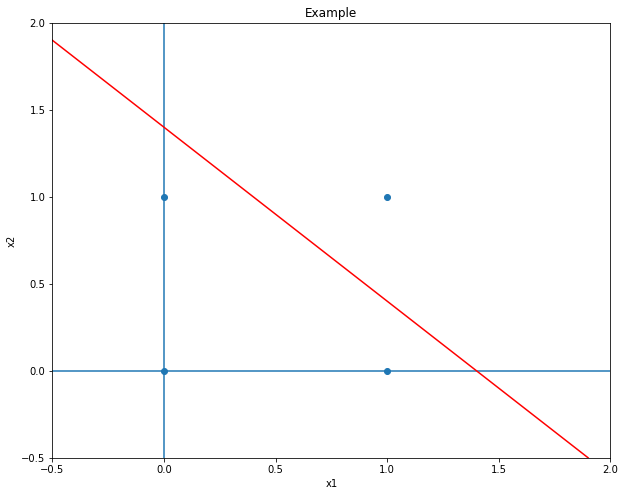

In [40]:
f = lambda x1: -x1 + 1.4
x1 = np.arange(-2,2, 0.1)
x2 = f(x1)

case_x1 = [0, 0, 1, 1]
case_x2 = [0, 1, 0, 1]

# 시각화
plt.figure(figsize=(10,8))
plt.title('Example')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlim([-0.5, 2])
plt.ylim([-0.5, 2])
plt.scatter(case_x1, case_x2) # 점
plt.plot(x1, x2, 'r') # 선
plt.show()

In [13]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [43]:
# 편향(bias)를 넣어서 값 확인
x = np.array([0, 1]) # input
w = np.array([0.5, 0.5]) # 가중치, weight
b = -0.7

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


In [46]:
# AND 게이트 구현
def AND(x1, x2):
    x = np.array([x1, x2]) # input
    w = np.array([0.5, 0.5]) # 가중치, weight
    b = -0.7

    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1  

In [48]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [49]:
# NAND 게이트 구현 
def NAND(x1, x2):
    x = np.array([x1, x2]) # input
    w = np.array([-0.5, -0.5]) # 가중치, weight
    b = 0.7

    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1  

In [50]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [52]:
# OR 게이트 구현 
def OR(x1, x2):
    x = np.array([x1, x2]) # input
    w = np.array([0.5, 0.5]) # 가중치, weight
    b = -0.2

    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1  

In [53]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


층을 쌓아서 (게이트를 조합해서)
XOR 게이트를 만들 수 있다

In [54]:
# XOR 게이트 구현
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [58]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0
